# Location estimation using RSSI of wireless LAN

---


## Team C-LAMP

## Introduction

In this project, we aim to build a model to predict location based on RSSI readings from Access Points. The data for the project was provided by RISING, Japan for the problem ITU-ML5G-PS-016: Location estimation using RSSI of wireless LAN - organied as a part of the "ITU AI/ML in 5G Challenge: applying machine learning in communication networks". 

This project is divided into the following phases: 

- Phase 1: Emphasis is given on data preprocessing and exploration ,which will be covered in this report. Following this  the data and its attributes are described. Following this data preprocessing and transformation is done to efficiently fit the developed models. 
- Phase 2: Prediction model building is covered in this phase of the project.

##Dataset

The provided data sets consist of the following files:

1. AP_info.csv: CSV file providing the location (Latitude, Longitude) and environmental specification for a set of 4 access points (hereby referred to as APs).
2. training_dataset.csv: CSV file providing us with the data acquired from four APs to be used for training the model. 
    
    Data includes :
    - TimeStamp(UNIX)	
    - Latitude	of Reference Point
    - Longitude	of Reference Point
    - SSID of Access Point
    - Channel	
    - RSSI(dBm)

  Data from 13 unique reference points are present in this dataset.

3. verification_dataset.csv: CSV file providing us with the data acquired from the four APs to be used for testing the model. 
    
    Data includes :
    - TimeStamp(UNIX)	
    - Latitude	of Reference Point
    - Longitude	of Reference Point
    - SSID of Access Point
    - Channel	
    - RSSI(dBm)

  Data from 13 unique reference points are present in this dataset.

The data in the datasets training_dataset.csv and  verification_dataset.csv have been collected from the same set of 4 APs at identical location.

The data set also contains a timestamp on when the RSSI readings of the 4 APs was made. The each data set has 5200 observations.

A map of the reference and the access points was provided with the dataset, as shown below:

![picture](https://drive.google.com/uc?export=view&id=1UoF4iMbTNJ_323xPSADQPs_qTEKl5nSm)


##Data Pre-processing

### Preliminaries

The following Python packages were used in this project.

```
import numpy
import pandas 
import tensorflow 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
```
A short mentioning of the used packages:

- numpy has been used for high-level mathematical functions
- pandas has been mainly used for data manipulation and analysis.
- tensorflow was used for training and inference of deep neural networks.
- sklearn has many inbuilt functions containing various classification and regression algorithms which were used in this project
- matplotlib was used in plotting various kinds of graphs and charts



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import os
import time
cwd = os.getcwd()
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Storing the path names

In [2]:
AP_train_path='/content/drive/MyDrive/CDAC/RSSI Dataset Grand Finale/AP_info.csv'
Wifi_train_path ='/content/drive/MyDrive/CDAC/RSSI Dataset Grand Finale/training_dataset.csv'
Wifi_test_path ='/content/drive/MyDrive/CDAC/RSSI Dataset Grand Finale/verification_dataset.csv'

Reading the csv files and storing in form of dataset

In [3]:
AP_train=pd.read_csv(AP_train_path)

Transforming the categorical data to numerical ones using one-hot-encoding

In [4]:
AP_train = pd.concat([AP_train,pd.get_dummies(AP_train['Indoor/Outdoor'])['Outdoor']], axis=1, join='inner').drop(columns=['Indoor/Outdoor'])

Let us have a look at the AP provided information

In [5]:
AP_train

,AP SSID,Latitude,Longitude,Hight Difference(m),Outdoor
0,1,35.157320,136.926447,0,1
1,2,35.157347,136.926807,0,1
2,3,35.157202,136.926827,0,1
3,4,35.157165,136.926470,0,1


In [6]:
AP_train = AP_train.astype({"Latitude":'float64',"Longitude":'float64',"Hight Difference(m)":'float64'})

Reading the measured data from the APs from training_dataset.csv and verification_dataset.csv and storing them inform of datasets.

In [7]:
train = pd.read_csv(Wifi_train_path)
test = pd.read_csv(Wifi_test_path)

In [8]:
train.drop(columns=['No.'], inplace=True)
test.drop(columns=['No.'], inplace=True)

Having a look at the datasets:

In [9]:
train

,TimeStamp(UNIX),Latitude,Longitude,SSID,Channel,RSSI(dBm)
0,1631687696,35.157140,136.926306,1,11,-41
1,1631687697,35.157140,136.926306,1,11,-41
2,1631687697,35.157140,136.926306,1,11,-41
3,1631687697,35.157140,136.926306,1,11,-41
4,1631687697,35.157140,136.926306,1,11,-41
...,...,...,...,...,...,...
5195,1631688763,35.157236,136.926489,4,1,-52
5196,1631688763,35.157236,136.926489,4,1,-52
5197,1631688763,35.157236,136.926489,4,1,-52
5198,1631688763,35.157236,136.926489,4,1,-52


In [10]:
test

,TimeStamp(UNIX),Latitude,Longitude,SSID,Channel,RSSI(dBm)
0,1631689137,35.157261,136.926465,1,11,-41
1,1631689137,35.157261,136.926465,1,11,-41
2,1631689138,35.157261,136.926465,1,11,-41
3,1631689138,35.157261,136.926465,1,11,-41
4,1631689138,35.157261,136.926465,1,11,-41
...,...,...,...,...,...,...
5195,1631691291,35.157298,136.926575,4,1,-59
5196,1631691291,35.157298,136.926575,4,1,-59
5197,1631691291,35.157298,136.926575,4,1,-59
5198,1631691291,35.157298,136.926575,4,1,-59


Removing the duplicate data present :

In [11]:
train.drop_duplicates(subset=['TimeStamp(UNIX)','Latitude','Longitude','SSID','RSSI(dBm)'],keep='first',inplace=True)
test.drop_duplicates(subset=['TimeStamp(UNIX)','Latitude','Longitude','SSID','RSSI(dBm)'],keep='first',inplace=True)
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

Merging the information of APs with the training and testing data:

In [12]:
train_semi = train.merge(AP_train, how='inner', left_on='SSID', right_on='AP SSID').drop(columns=['AP SSID'])
test_semi = test.merge(AP_train, how='inner', left_on='SSID', right_on='AP SSID').drop(columns=['AP SSID'])

Renaming the columns to make it more comprehensible

In [13]:
train_semi.rename(columns = {'Latitude_x':'Latitude_OP','Longitude_x':'Longitude_OP', 'Latitude_y':'Latitude_AP', 'Longitude_y':'Longitude_AP'},inplace=True)
test_semi.rename(columns = {'Latitude_x':'Latitude_OP','Longitude_x':'Longitude_OP', 'Latitude_y':'Latitude_AP', 'Longitude_y':'Longitude_AP'},inplace=True)

As according to the research done in this domain, there is a clear cut relationship between RSSI and euclidean distance between the AP and the reference point (as shown in the formula below), hence we add a feature of the same.

![picture](https://drive.google.com/uc?export=view&id=15tuh-QXcKEVx1P8EW9MuWRd_lJlTpywg)

In [14]:
def euclidean_dist(lat_op, long_op, lat_ap, long_ap, height):
  return (((lat_op - lat_ap)*111000)**2 + ((long_op - long_ap)*111000)**2 + height**2)**0.5

Since, we observe a significant variation in the provided RSSI data values (possibly due to multipath fading), we added a Moving Average of RSSI feature to smoothen the sudden variations in data.

In [15]:
def moving_average(inp):
  moving_avg=list(inp["RSSI(dBm)"][:4])
  i = 0
  window_size=10
  while i < len(list(inp["RSSI(dBm)"])) - window_size + 1:
      this_window = list(inp["RSSI(dBm)"][i : i + window_size])
      window_average = sum(this_window) / window_size
      moving_avg.append(window_average)
      i += 1
  for z in range(len(list(inp["RSSI(dBm)"]))-len(moving_avg)):
    moving_avg.append(moving_avg[-1])
  return moving_avg

In [16]:
train_semi['Distance'] = train_semi.apply(lambda row: euclidean_dist(row['Latitude_OP'],row['Longitude_OP'],row['Latitude_AP'],row['Longitude_AP'],row['Hight Difference(m)']),axis=1)
test_semi['Distance'] = test_semi.apply(lambda row: euclidean_dist(row['Latitude_OP'],row['Longitude_OP'],row['Latitude_AP'],row['Longitude_AP'],row['Hight Difference(m)']),axis=1)

In [17]:
train_semi = pd.concat([train_semi,pd.DataFrame(moving_average(train_semi), columns = ['Moving Average (RSSI)'])], axis=1)
test_semi = pd.concat([test_semi,pd.DataFrame(moving_average(test_semi), columns = ['Moving Average (RSSI)'])], axis=1)

In [18]:
train_semi

,TimeStamp(UNIX),Latitude_OP,Longitude_OP,SSID,Channel,RSSI(dBm),Latitude_AP,Longitude_AP,Hight Difference(m),Outdoor,Distance,Moving Average (RSSI)
0,1631687696,35.157140,136.926306,1,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.0
1,1631687697,35.157140,136.926306,1,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.0
2,1631687698,35.157140,136.926306,1,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.0
3,1631687699,35.157140,136.926306,1,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.0
4,1631687700,35.157140,136.926306,1,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1071,1631688759,35.157236,136.926489,4,1,-52,35.157165,136.926470,0.0,1,8.152950,-52.0
1072,1631688760,35.157236,136.926489,4,1,-52,35.157165,136.926470,0.0,1,8.152950,-52.0
1073,1631688761,35.157236,136.926489,4,1,-52,35.157165,136.926470,0.0,1,8.152950,-52.0
1074,1631688762,35.157236,136.926489,4,1,-52,35.157165,136.926470,0.0,1,8.152950,-52.0


In [19]:
final_train = train_semi.copy()
final_test = test_semi.copy()

In [20]:
 train_semi.drop_duplicates(subset=['TimeStamp(UNIX)','Latitude_OP','Longitude_OP','RSSI(dBm)'])

,TimeStamp(UNIX),Latitude_OP,Longitude_OP,SSID,Channel,RSSI(dBm),Latitude_AP,Longitude_AP,Hight Difference(m),Outdoor,Distance,Moving Average (RSSI)
0,1631687696,35.157140,136.926306,1,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.0
1,1631687697,35.157140,136.926306,1,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.0
2,1631687698,35.157140,136.926306,1,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.0
3,1631687699,35.157140,136.926306,1,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.0
4,1631687700,35.157140,136.926306,1,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1071,1631688759,35.157236,136.926489,4,1,-52,35.157165,136.926470,0.0,1,8.152950,-52.0
1072,1631688760,35.157236,136.926489,4,1,-52,35.157165,136.926470,0.0,1,8.152950,-52.0
1073,1631688761,35.157236,136.926489,4,1,-52,35.157165,136.926470,0.0,1,8.152950,-52.0
1074,1631688762,35.157236,136.926489,4,1,-52,35.157165,136.926470,0.0,1,8.152950,-52.0


In [21]:
train["RSSI_AAA001"] = np.where(train['SSID'] == 1, train["RSSI(dBm)"], "")
train["RSSI_AAA002"] = np.where(train['SSID'] == 2, train["RSSI(dBm)"], "")
train["RSSI_AAA003"] = np.where(train['SSID'] == 3, train["RSSI(dBm)"], "")
train["RSSI_AAA004"] = np.where(train['SSID'] == 4, train["RSSI(dBm)"], "")

In [22]:
train.drop(['SSID','RSSI(dBm)'],axis=1,inplace=True)

In [23]:
train

,TimeStamp(UNIX),Latitude,Longitude,Channel,RSSI_AAA001,RSSI_AAA002,RSSI_AAA003,RSSI_AAA004
0,1631687696,35.157140,136.926306,11,-41,,,
1,1631687697,35.157140,136.926306,11,-41,,,
2,1631687698,35.157140,136.926306,11,-41,,,
3,1631687699,35.157140,136.926306,11,-41,,,
4,1631687700,35.157140,136.926306,11,-41,,,
...,...,...,...,...,...,...,...,...
1071,1631688759,35.157236,136.926489,1,,,,-52
1072,1631688760,35.157236,136.926489,1,,,,-52
1073,1631688761,35.157236,136.926489,1,,,,-52
1074,1631688762,35.157236,136.926489,1,,,,-52


In [24]:
train_semi

,TimeStamp(UNIX),Latitude_OP,Longitude_OP,SSID,Channel,RSSI(dBm),Latitude_AP,Longitude_AP,Hight Difference(m),Outdoor,Distance,Moving Average (RSSI)
0,1631687696,35.157140,136.926306,1,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.0
1,1631687697,35.157140,136.926306,1,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.0
2,1631687698,35.157140,136.926306,1,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.0
3,1631687699,35.157140,136.926306,1,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.0
4,1631687700,35.157140,136.926306,1,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1071,1631688759,35.157236,136.926489,4,1,-52,35.157165,136.926470,0.0,1,8.152950,-52.0
1072,1631688760,35.157236,136.926489,4,1,-52,35.157165,136.926470,0.0,1,8.152950,-52.0
1073,1631688761,35.157236,136.926489,4,1,-52,35.157165,136.926470,0.0,1,8.152950,-52.0
1074,1631688762,35.157236,136.926489,4,1,-52,35.157165,136.926470,0.0,1,8.152950,-52.0


In [25]:
train_semi = pd.concat([train_semi,pd.get_dummies(train_semi['SSID'])], axis=1, join='inner').drop(columns=['SSID'])
test_semi = pd.concat([test_semi,pd.get_dummies(test_semi['SSID'])], axis=1, join='inner').drop(columns=['SSID'])

In [26]:
train_semi

,TimeStamp(UNIX),Latitude_OP,Longitude_OP,Channel,RSSI(dBm),Latitude_AP,Longitude_AP,Hight Difference(m),Outdoor,Distance,Moving Average (RSSI),1,2,3,4
0,1631687696,35.157140,136.926306,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.0,1,0,0,0
1,1631687697,35.157140,136.926306,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.0,1,0,0,0
2,1631687698,35.157140,136.926306,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.0,1,0,0,0
3,1631687699,35.157140,136.926306,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.0,1,0,0,0
4,1631687700,35.157140,136.926306,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,1631688759,35.157236,136.926489,1,-52,35.157165,136.926470,0.0,1,8.152950,-52.0,0,0,0,1
1072,1631688760,35.157236,136.926489,1,-52,35.157165,136.926470,0.0,1,8.152950,-52.0,0,0,0,1
1073,1631688761,35.157236,136.926489,1,-52,35.157165,136.926470,0.0,1,8.152950,-52.0,0,0,0,1
1074,1631688762,35.157236,136.926489,1,-52,35.157165,136.926470,0.0,1,8.152950,-52.0,0,0,0,1


In [27]:
test_semi

,TimeStamp(UNIX),Latitude_OP,Longitude_OP,Channel,RSSI(dBm),Latitude_AP,Longitude_AP,Hight Difference(m),Outdoor,Distance,Moving Average (RSSI),1,2,3,4
0,1631689137,35.157261,136.926465,11,-41,35.157320,136.926447,0.0,1,6.906728,-41.0,1,0,0,0
1,1631689138,35.157261,136.926465,11,-41,35.157320,136.926447,0.0,1,6.906728,-41.0,1,0,0,0
2,1631689139,35.157261,136.926465,11,-41,35.157320,136.926447,0.0,1,6.906728,-41.0,1,0,0,0
3,1631689140,35.157261,136.926465,11,-41,35.157320,136.926447,0.0,1,6.906728,-41.0,1,0,0,0
4,1631689141,35.157261,136.926465,11,-41,35.157320,136.926447,0.0,1,6.906728,-41.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1631691288,35.157298,136.926575,1,-59,35.157165,136.926470,0.0,1,18.773415,-59.0,0,0,0,1
1097,1631691289,35.157298,136.926575,1,-59,35.157165,136.926470,0.0,1,18.773415,-59.0,0,0,0,1
1098,1631691290,35.157298,136.926575,1,-59,35.157165,136.926470,0.0,1,18.773415,-59.0,0,0,0,1
1099,1631691291,35.157298,136.926575,1,-59,35.157165,136.926470,0.0,1,18.773415,-59.0,0,0,0,1


##Models

For model development we follow two main concepts
1. RSSI Distance Estimation
2. RSSI Fingerprinting

### 1. RSSI Distance Estimation

RSSI distance estimation is solely dependent on a clear correlation between distance and RSSI value. As mentioned previously clear correlation is not present, thereby giving us considerable distance error between the predicted location and actual location.

For performing the same we have tried several algorithms, the following have yielded the best results:

### (i) Linear Regression using Polynomial Features of Degree 2:


Since from the formula of RSSI and distance :

![picture](https://drive.google.com/uc?export=view&id=15tuh-QXcKEVx1P8EW9MuWRd_lJlTpywg)

where n=2, an inverse square law exists between RSSI and distance, thereby motivating us to use the same.

The following illustrate the results obtained:

In [28]:
trainX_final = train_semi[['Latitude_AP', 'Longitude_AP', 'Channel', 'RSSI(dBm)', 'Hight Difference(m)', 'Outdoor', 'Moving Average (RSSI)', 1, 2, 3, 4]]
trainY_final = train_semi[['Latitude_OP','Longitude_OP','Distance']]

In [29]:
testX_final = test_semi[['Latitude_AP', 'Longitude_AP', 'Channel', 'RSSI(dBm)', 'Hight Difference(m)', 'Outdoor', 'Moving Average (RSSI)', 1, 2, 3, 4]]
testY_final = test_semi[['Latitude_OP','Longitude_OP','Distance']]

In [30]:
mm_scaler = MinMaxScaler()
train_X = pd.DataFrame(mm_scaler.fit_transform(trainX_final),columns=['Latitude_AP', 'Longitude_AP', 'Channel', 'RSSI(dBm)', 'Hight Difference(m)', 'Outdoor', 'Moving Average (RSSI)', '1', '2', '3', '4'])
test_X = pd.DataFrame(mm_scaler.transform(testX_final),columns=['Latitude_AP', 'Longitude_AP', 'Channel', 'RSSI(dBm)', 'Hight Difference(m)', 'Outdoor', 'Moving Average (RSSI)', '1', '2', '3', '4'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [31]:
trainX_final

,Latitude_AP,Longitude_AP,Channel,RSSI(dBm),Hight Difference(m),Outdoor,Moving Average (RSSI),1,2,3,4
0,35.157320,136.926447,11,-41,0.0,1,-41.0,1,0,0,0
1,35.157320,136.926447,11,-41,0.0,1,-41.0,1,0,0,0
2,35.157320,136.926447,11,-41,0.0,1,-41.0,1,0,0,0
3,35.157320,136.926447,11,-41,0.0,1,-41.0,1,0,0,0
4,35.157320,136.926447,11,-41,0.0,1,-41.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1071,35.157165,136.926470,1,-52,0.0,1,-52.0,0,0,0,1
1072,35.157165,136.926470,1,-52,0.0,1,-52.0,0,0,0,1
1073,35.157165,136.926470,1,-52,0.0,1,-52.0,0,0,0,1
1074,35.157165,136.926470,1,-52,0.0,1,-52.0,0,0,0,1


In [32]:
train_X

,Latitude_AP,Longitude_AP,Channel,RSSI(dBm),Hight Difference(m),Outdoor,Moving Average (RSSI),1,2,3,4
0,0.852747,0.000000,1.0,1.000,0.0,0.0,1.000,1.0,0.0,0.0,0.0
1,0.852747,0.000000,1.0,1.000,0.0,0.0,1.000,1.0,0.0,0.0,0.0
2,0.852747,0.000000,1.0,1.000,0.0,0.0,1.000,1.0,0.0,0.0,0.0
3,0.852747,0.000000,1.0,1.000,0.0,0.0,1.000,1.0,0.0,0.0,0.0
4,0.852747,0.000000,1.0,1.000,0.0,0.0,1.000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1071,0.000000,0.060016,0.0,0.725,0.0,0.0,0.725,0.0,0.0,0.0,1.0
1072,0.000000,0.060016,0.0,0.725,0.0,0.0,0.725,0.0,0.0,0.0,1.0
1073,0.000000,0.060016,0.0,0.725,0.0,0.0,0.725,0.0,0.0,0.0,1.0
1074,0.000000,0.060016,0.0,0.725,0.0,0.0,0.725,0.0,0.0,0.0,1.0


In [33]:
test_semi

,TimeStamp(UNIX),Latitude_OP,Longitude_OP,Channel,RSSI(dBm),Latitude_AP,Longitude_AP,Hight Difference(m),Outdoor,Distance,Moving Average (RSSI),1,2,3,4
0,1631689137,35.157261,136.926465,11,-41,35.157320,136.926447,0.0,1,6.906728,-41.0,1,0,0,0
1,1631689138,35.157261,136.926465,11,-41,35.157320,136.926447,0.0,1,6.906728,-41.0,1,0,0,0
2,1631689139,35.157261,136.926465,11,-41,35.157320,136.926447,0.0,1,6.906728,-41.0,1,0,0,0
3,1631689140,35.157261,136.926465,11,-41,35.157320,136.926447,0.0,1,6.906728,-41.0,1,0,0,0
4,1631689141,35.157261,136.926465,11,-41,35.157320,136.926447,0.0,1,6.906728,-41.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1631691288,35.157298,136.926575,1,-59,35.157165,136.926470,0.0,1,18.773415,-59.0,0,0,0,1
1097,1631691289,35.157298,136.926575,1,-59,35.157165,136.926470,0.0,1,18.773415,-59.0,0,0,0,1
1098,1631691290,35.157298,136.926575,1,-59,35.157165,136.926470,0.0,1,18.773415,-59.0,0,0,0,1
1099,1631691291,35.157298,136.926575,1,-59,35.157165,136.926470,0.0,1,18.773415,-59.0,0,0,0,1


In [34]:
test_X

,Latitude_AP,Longitude_AP,Channel,RSSI(dBm),Hight Difference(m),Outdoor,Moving Average (RSSI),1,2,3,4
0,0.852747,0.000000,1.0,1.00,0.0,0.0,1.00,1.0,0.0,0.0,0.0
1,0.852747,0.000000,1.0,1.00,0.0,0.0,1.00,1.0,0.0,0.0,0.0
2,0.852747,0.000000,1.0,1.00,0.0,0.0,1.00,1.0,0.0,0.0,0.0
3,0.852747,0.000000,1.0,1.00,0.0,0.0,1.00,1.0,0.0,0.0,0.0
4,0.852747,0.000000,1.0,1.00,0.0,0.0,1.00,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1096,0.000000,0.060016,0.0,0.55,0.0,0.0,0.55,0.0,0.0,0.0,1.0
1097,0.000000,0.060016,0.0,0.55,0.0,0.0,0.55,0.0,0.0,0.0,1.0
1098,0.000000,0.060016,0.0,0.55,0.0,0.0,0.55,0.0,0.0,0.0,1.0
1099,0.000000,0.060016,0.0,0.55,0.0,0.0,0.55,0.0,0.0,0.0,1.0


###Linear Regression with Polynomial Features of Degree 2

####Estimation of Distance of RP from AP using Linear Regression with Polynomial Feature of Degree 2

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [36]:
polyfeat = PolynomialFeatures(degree=2)
newtrain_X = polyfeat.fit_transform(train_X[['Channel', 'RSSI(dBm)', 'Hight Difference(m)', 'Outdoor', 'Moving Average (RSSI)']])
newtest_X = polyfeat.transform(test_X[['Channel', 'RSSI(dBm)', 'Hight Difference(m)', 'Outdoor', 'Moving Average (RSSI)']])

In [37]:
model1 = LinearRegression(normalize=True, fit_intercept=False)
model1.fit(newtrain_X, trainY_final['Distance'])
pred_y = model1.predict(newtest_X)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


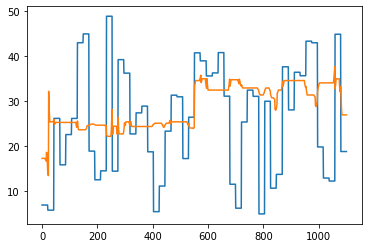

In [38]:
plt.plot(testY_final['Distance'])
plt.plot(pred_y)
plt.show()

In [39]:
dist_err=((testY_final['Distance']-pred_y)**2)**0.5
df_error = pd.DataFrame(dist_err, columns = ['Distance Error'])
dist_err

0       10.345729
1       10.345729
2       10.345729
3       10.345729
4       10.345729
          ...    
1096     8.126144
1097     8.126144
1098     8.126144
1099     8.126144
1100     8.126144
Name: Distance, Length: 1101, dtype: float64

In [40]:
dist_err

0       10.345729
1       10.345729
2       10.345729
3       10.345729
4       10.345729
          ...    
1096     8.126144
1097     8.126144
1098     8.126144
1099     8.126144
1100     8.126144
Name: Distance, Length: 1101, dtype: float64

In [41]:
dist_err.mean()

9.863278183131035

In [42]:
dist_err.max()

28.615543060449383

In [43]:
count = len([i for i in list(dist_err) if i  < 2])
low_error = count / len(list(dist_err)) * 100
print("Percentage of data with less than 2m error : ",low_error)

Percentage of data with less than 2m error :  16.62125340599455


####Direct estimation of Latitude and Longitude using Linear Regression with Polynomial Feature of Degree 2

In [44]:
polyfeat = PolynomialFeatures(degree=2)
newtrain_X = polyfeat.fit_transform(train_X[['Latitude_AP','Longitude_AP','Channel', 'RSSI(dBm)', 'Hight Difference(m)', 'Outdoor', 'Moving Average (RSSI)','1','2','3','4']])
newtest_X = polyfeat.transform(test_X[['Latitude_AP','Longitude_AP','Channel', 'RSSI(dBm)', 'Hight Difference(m)', 'Outdoor', 'Moving Average (RSSI)','1','2','3','4']])

In [45]:
model2 = LinearRegression(normalize=True, fit_intercept=False)
model2.fit(newtrain_X, trainY_final[['Latitude_OP','Longitude_OP']])
pred_y = model2.predict(newtest_X)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


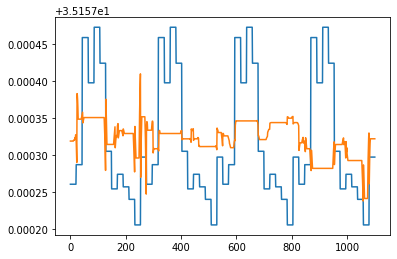

In [46]:
plt.plot(testY_final[['Latitude_OP']])
plt.plot(pred_y[:,0])
plt.show()

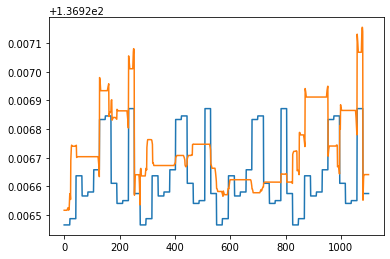

In [47]:
plt.plot(testY_final[['Longitude_OP']])
plt.plot(pred_y[:,1])
plt.show()

In [48]:
pred = pd.DataFrame(pred_y, columns = ['Latitude','Longitude'])
pred['dist_err'] = (((pred['Latitude']-testY_final['Latitude_OP'])*111000)**2 + (((pred['Longitude']-testY_final['Longitude_OP'])*111000)**2))**0.5
pred['dist_err'].mean()

20.078328934137563

In [49]:
pred['dist_err'].max()

42.45041076685584

In [50]:
count = len([i for i in list(pred['dist_err']) if i  < 2])
low_error = count / len(list(pred['dist_err'])) * 100
print("Percentage of data with less than 2m error : ",low_error)

Percentage of data with less than 2m error :  0.0


###AdaBoost

In this case we trained 8 different models for the 4 different APs.
Two models for each AP for predicting Latitude and Longitude of the reference points/observation points respectively.

####Distance Estimation using AdaBoost

In [51]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

In [52]:
train_semi

,TimeStamp(UNIX),Latitude_OP,Longitude_OP,Channel,RSSI(dBm),Latitude_AP,Longitude_AP,Hight Difference(m),Outdoor,Distance,Moving Average (RSSI),1,2,3,4
0,1631687696,35.157140,136.926306,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.0,1,0,0,0
1,1631687697,35.157140,136.926306,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.0,1,0,0,0
2,1631687698,35.157140,136.926306,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.0,1,0,0,0
3,1631687699,35.157140,136.926306,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.0,1,0,0,0
4,1631687700,35.157140,136.926306,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,1631688759,35.157236,136.926489,1,-52,35.157165,136.926470,0.0,1,8.152950,-52.0,0,0,0,1
1072,1631688760,35.157236,136.926489,1,-52,35.157165,136.926470,0.0,1,8.152950,-52.0,0,0,0,1
1073,1631688761,35.157236,136.926489,1,-52,35.157165,136.926470,0.0,1,8.152950,-52.0,0,0,0,1
1074,1631688762,35.157236,136.926489,1,-52,35.157165,136.926470,0.0,1,8.152950,-52.0,0,0,0,1


In [53]:
mm_scaler = MinMaxScaler()
train_semiX = pd.DataFrame(mm_scaler.fit_transform(train_semi[['Latitude_AP', 'Longitude_AP', 'Channel', 'RSSI(dBm)', 'Hight Difference(m)', 'Outdoor', 'Moving Average (RSSI)', 1, 2, 3, 4]]),columns=['Latitude_AP', 'Longitude_AP', 'Channel', 'RSSI(dBm)', 'Hight Difference(m)', 'Outdoor', 'Moving Average (RSSI)', 1, 2, 3, 4])
test_semiX = pd.DataFrame(mm_scaler.transform(test_semi[['Latitude_AP', 'Longitude_AP', 'Channel', 'RSSI(dBm)', 'Hight Difference(m)', 'Outdoor', 'Moving Average (RSSI)', 1, 2, 3, 4]]),columns=['Latitude_AP', 'Longitude_AP', 'Channel', 'RSSI(dBm)', 'Hight Difference(m)', 'Outdoor', 'Moving Average (RSSI)', 1, 2, 3, 4])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [54]:
ap01_dat_tr = pd.concat([train_semiX[train_semiX[1]==1],(train_semi[train_semi[1]==1])[['Distance','Latitude_OP','Longitude_OP']]],axis=1).reset_index(drop=True)
ap02_dat_tr = pd.concat([train_semiX[train_semiX[2]==1],(train_semi[train_semi[2]==1])[['Distance','Latitude_OP','Longitude_OP']]],axis=1).reset_index(drop=True)
ap03_dat_tr = pd.concat([train_semiX[train_semiX[3]==1],(train_semi[train_semi[3]==1])[['Distance','Latitude_OP','Longitude_OP']]],axis=1).reset_index(drop=True)
ap04_dat_tr = pd.concat([train_semiX[train_semiX[4]==1],(train_semi[train_semi[4]==1])[['Distance','Latitude_OP','Longitude_OP']]],axis=1).reset_index(drop=True)
ap01_dat_te = pd.concat([test_semiX[test_semiX[1]==1],(test_semi[test_semi[1]==1])[['Distance','Latitude_OP','Longitude_OP']]],axis=1).reset_index(drop=True)
ap02_dat_te = pd.concat([test_semiX[test_semiX[2]==1],(test_semi[test_semi[2]==1])[['Distance','Latitude_OP','Longitude_OP']]],axis=1).reset_index(drop=True)
ap03_dat_te = pd.concat([test_semiX[test_semiX[3]==1],(test_semi[test_semi[3]==1])[['Distance','Latitude_OP','Longitude_OP']]],axis=1).reset_index(drop=True)
ap04_dat_te = pd.concat([test_semiX[test_semiX[4]==1],(test_semi[test_semi[4]==1])[['Distance','Latitude_OP','Longitude_OP']]],axis=1).reset_index(drop=True)

In [55]:
ap01_datX_tr = ap01_dat_tr[['Outdoor','Moving Average (RSSI)']]
ap01_datY_tr = ap01_dat_tr[['Distance']]
ap02_datX_tr = ap02_dat_tr[['Outdoor','Moving Average (RSSI)']]
ap02_datY_tr = ap02_dat_tr[['Distance']]
ap03_datX_tr = ap03_dat_tr[['Outdoor','Moving Average (RSSI)']]
ap03_datY_tr = ap03_dat_tr[['Distance']]
ap04_datX_tr = ap04_dat_tr[['Outdoor','Moving Average (RSSI)']]
ap04_datY_tr = ap04_dat_tr[['Distance']]
ap01_datX_te = ap01_dat_te[['Outdoor','Moving Average (RSSI)']]
ap01_datY_te = ap01_dat_te[['Distance']]
ap02_datX_te = ap02_dat_te[['Outdoor','Moving Average (RSSI)']]
ap02_datY_te = ap02_dat_te[['Distance']]
ap03_datX_te = ap03_dat_te[['Outdoor','Moving Average (RSSI)']]
ap03_datY_te = ap03_dat_te[['Distance']]
ap04_datX_te = ap04_dat_te[['Outdoor','Moving Average (RSSI)']]
ap04_datY_te = ap04_dat_te[['Distance']]

In [56]:
polyfeat = PolynomialFeatures(degree=2)
ap01_datX_tr = polyfeat.fit_transform(ap01_datX_tr)
ap01_datX_te = polyfeat.transform(ap01_datX_te)
polyfeat = PolynomialFeatures(degree=2)
ap02_datX_tr = polyfeat.fit_transform(ap02_datX_tr)
ap02_datX_te = polyfeat.transform(ap02_datX_te)
polyfeat = PolynomialFeatures(degree=2)
ap03_datX_tr = polyfeat.fit_transform(ap03_datX_tr)
ap03_datX_te = polyfeat.transform(ap03_datX_te)
polyfeat = PolynomialFeatures(degree=2)
ap04_datX_tr = polyfeat.fit_transform(ap04_datX_tr)
ap04_datX_te = polyfeat.transform(ap04_datX_te)

In [57]:
ada_AP1 = AdaBoostRegressor(n_estimators=50)
ada_AP1.fit(ap01_datX_tr,ap01_datY_tr)
prediction = ada_AP1.predict(ap01_datX_te)
prediction = prediction.reshape(-1,1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


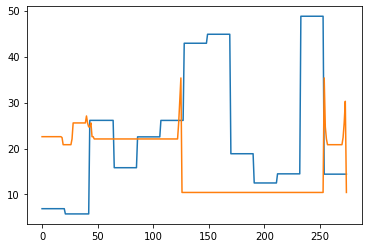

In [58]:
plt.plot(ap01_datY_te)
plt.plot(prediction)
plt.show()

In [59]:
dist_err=((ap01_datY_te-prediction)**2)**0.5
df_error = pd.DataFrame(dist_err, columns = ['Distance Error'])
dist_err

,Distance
0,15.665519
1,15.665519
2,15.665519
3,15.665519
4,15.665519
...,...
270,6.410593
271,7.961828
272,11.142346
273,15.856848


In [60]:
dist_err.mean()

Distance    13.616292
dtype: float64

In [61]:
dist_err.max()

Distance    38.332407
dtype: float64

In [62]:
count = len([i for i in list(dist_err['Distance']) if i  < 2])
low_error = count / len(list(dist_err['Distance'])) * 100
print("Percentage of data with less than 2m error : ",low_error)

Percentage of data with less than 2m error :  8.727272727272728


In [63]:
ada_AP2 = AdaBoostRegressor(n_estimators=50)
ada_AP2.fit(ap02_datX_tr,ap02_datY_tr)
prediction = ada_AP2.predict(ap02_datX_te)
prediction = prediction.reshape(-1,1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


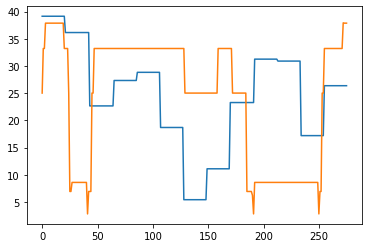

In [64]:
plt.plot(ap02_datY_te)
plt.plot(prediction)
plt.show()

In [65]:
dist_err=((ap02_datY_te-prediction)**2)**0.5
df_error = pd.DataFrame(dist_err, columns = ['Distance Error'])
dist_err

,Distance
0,14.120991
1,5.926924
2,5.926924
3,1.269421
4,1.269421
...,...
271,6.837727
272,11.552471
273,11.495231
274,11.495231


In [66]:
dist_err.mean()

Distance    12.986783
dtype: float64

In [67]:
dist_err.max()

Distance    33.332312
dtype: float64

In [68]:
count = len([i for i in list(dist_err['Distance']) if i  < 2])
low_error = count / len(list(dist_err['Distance'])) * 100
print("Percentage of data with less than 2m error : ",low_error)

Percentage of data with less than 2m error :  10.869565217391305


In [69]:
ada_AP3 = AdaBoostRegressor(n_estimators=50)
ada_AP3.fit(ap03_datX_tr,ap03_datY_tr)
prediction = ada_AP3.predict(ap03_datX_te)
prediction = prediction.reshape(-1,1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


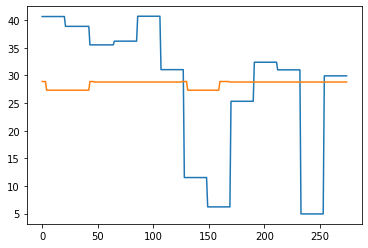

In [70]:
plt.plot(ap03_datY_te)
plt.plot(prediction)
plt.show()

In [71]:
dist_err=((ap03_datY_te-prediction)**2)**0.5
df_error = pd.DataFrame(dist_err, columns = ['Distance Error'])
dist_err

,Distance
0,11.759434
1,11.759434
2,11.759434
3,11.759434
4,13.329621
...,...
270,1.117929
271,1.117929
272,1.117929
273,1.117929


In [72]:
dist_err.mean()

Distance    9.61157
dtype: float64

In [73]:
dist_err.max()

Distance    23.867479
dtype: float64

In [74]:
count = len([i for i in list(dist_err['Distance']) if i  < 2])
low_error = count / len(list(dist_err['Distance'])) * 100
print("Percentage of data with less than 2m error : ",low_error)

Percentage of data with less than 2m error :  7.636363636363637


In [75]:
ada_AP4 = AdaBoostRegressor(n_estimators=50)
ada_AP4.fit(ap04_datX_tr,ap04_datY_tr)
prediction = ada_AP4.predict(ap04_datX_te)
prediction = prediction.reshape(-1,1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


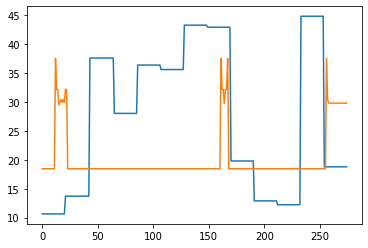

In [76]:
plt.plot(ap04_datY_te)
plt.plot(prediction)
plt.show()

In [77]:
dist_err=((ap04_datY_te-prediction)**2)**0.5
df_error = pd.DataFrame(dist_err, columns = ['Distance Error'])
dist_err

,Distance
0,7.798348
1,7.798348
2,7.798348
3,7.798348
4,7.798348
...,...
270,11.006122
271,11.006122
272,11.006122
273,11.006122


In [78]:
dist_err.mean()

Distance    13.619863
dtype: float64

In [79]:
dist_err.max()

Distance    26.859802
dtype: float64

In [80]:
count = len([i for i in list(dist_err['Distance']) if i  < 2])
low_error = count / len(list(dist_err['Distance'])) * 100
print("Percentage of data with less than 2m error : ",low_error)

Percentage of data with less than 2m error :  8.363636363636363


####Direct estimation of Latitude and Longitude using AdaBoost

In [81]:
ap01_datX_tr = ap01_dat_tr[['Latitude_AP','Longitude_AP','Outdoor','Moving Average (RSSI)']]
ap01_datY_tr = ap01_dat_tr[['Latitude_OP','Longitude_OP']]
ap02_datX_tr = ap02_dat_tr[['Latitude_AP','Longitude_AP','Outdoor','Moving Average (RSSI)']]
ap02_datY_tr = ap02_dat_tr[['Latitude_OP','Longitude_OP']]
ap03_datX_tr = ap03_dat_tr[['Latitude_AP','Longitude_AP','Outdoor','Moving Average (RSSI)']]
ap03_datY_tr = ap03_dat_tr[['Latitude_OP','Longitude_OP']]
ap04_datX_tr = ap04_dat_tr[['Latitude_AP','Longitude_AP','Outdoor','Moving Average (RSSI)']]
ap04_datY_tr = ap04_dat_tr[['Latitude_OP','Longitude_OP']]
ap01_datX_te = ap01_dat_te[['Latitude_AP','Longitude_AP','Outdoor','Moving Average (RSSI)']]
ap01_datY_te = ap01_dat_te[['Latitude_OP','Longitude_OP']]
ap02_datX_te = ap02_dat_te[['Latitude_AP','Longitude_AP','Outdoor','Moving Average (RSSI)']]
ap02_datY_te = ap02_dat_te[['Latitude_OP','Longitude_OP']]
ap03_datX_te = ap03_dat_te[['Latitude_AP','Longitude_AP','Outdoor','Moving Average (RSSI)']]
ap03_datY_te = ap03_dat_te[['Latitude_OP','Longitude_OP']]
ap04_datX_te = ap04_dat_te[['Latitude_AP','Longitude_AP','Outdoor','Moving Average (RSSI)']]
ap04_datY_te = ap04_dat_te[['Latitude_OP','Longitude_OP']]

In [82]:
ap01_datY_tr

,Latitude_OP,Longitude_OP
0,35.157140,136.926306
1,35.157140,136.926306
2,35.157140,136.926306
3,35.157140,136.926306
4,35.157140,136.926306
...,...,...
264,35.157236,136.926489
265,35.157236,136.926489
266,35.157236,136.926489
267,35.157236,136.926489


In [83]:
ada_AP1_Lat = AdaBoostRegressor(n_estimators=25)
ada_AP1_Lat.fit(ap01_datX_tr,ap01_datY_tr['Latitude_OP'])
prediction1_Lat = ada_AP1_Lat.predict(ap01_datX_te)
prediction1_Lat = pd.DataFrame(prediction1_Lat.reshape(-1,1),columns=['Latitude'])
ada_AP1_Lon = AdaBoostRegressor(n_estimators=25)
ada_AP1_Lon.fit(ap01_datX_tr,ap01_datY_tr['Longitude_OP'])
prediction1_Lon = ada_AP1_Lon.predict(ap01_datX_te)
prediction1_Lon = pd.DataFrame(prediction1_Lon.reshape(-1,1),columns=['Longitude'])

In [84]:
pred1 = pd.concat([prediction1_Lat,prediction1_Lon],axis=1)
pred['dist_err'] = (((pred1['Latitude']-ap01_datY_tr['Latitude_OP'])*111000)**2 + (((pred1['Longitude']-ap01_datY_tr['Longitude_OP'])*111000)**2))**0.5
pred['dist_err'].mean()

19.673131614487016

In [85]:
pred['dist_err'].max()

41.52826901703881

In [86]:
count = len([i for i in list(pred['dist_err']) if i  < 2])
low_error = count / len(list(pred['dist_err'])) * 100
print("Percentage of data with less than 2m error : ",low_error)

Percentage of data with less than 2m error :  1.725703905540418


In [87]:
ada_AP2_Lat = AdaBoostRegressor(n_estimators=25)
ada_AP2_Lat.fit(ap02_datX_tr,ap02_datY_tr['Latitude_OP'])
prediction2_Lat = ada_AP2_Lat.predict(ap02_datX_te)
prediction2_Lat = pd.DataFrame(prediction2_Lat.reshape(-1,1),columns=['Latitude'])
ada_AP2_Lon = AdaBoostRegressor(n_estimators=25)
ada_AP2_Lon.fit(ap02_datX_tr,ap01_datY_tr['Longitude_OP'])
prediction2_Lon = ada_AP2_Lon.predict(ap02_datX_te)
prediction2_Lon = pd.DataFrame(prediction2_Lon.reshape(-1,1),columns=['Longitude'])

In [88]:
pred2 = pd.concat([prediction2_Lat,prediction2_Lon],axis=1)
pred['dist_err'] = (((pred2['Latitude']-ap02_datY_tr['Latitude_OP'])*111000)**2 + (((pred2['Longitude']-ap02_datY_tr['Longitude_OP'])*111000)**2))**0.5
pred['dist_err'].mean()

17.97531831518963

In [89]:
pred['dist_err'].max()

58.822566511409164

In [90]:
count = len([i for i in list(pred['dist_err']) if i  < 2])
low_error = count / len(list(pred['dist_err'])) * 100
print("Percentage of data with less than 2m error : ",low_error)

Percentage of data with less than 2m error :  3.3605812897366025


In [91]:
ada_AP3_Lat = AdaBoostRegressor(n_estimators=25)
ada_AP3_Lat.fit(ap03_datX_tr,ap03_datY_tr['Latitude_OP'])
prediction3_Lat = ada_AP3_Lat.predict(ap03_datX_te)
prediction3_Lat = pd.DataFrame(prediction3_Lat.reshape(-1,1),columns=['Latitude'])
ada_AP3_Lon = AdaBoostRegressor(n_estimators=25)
ada_AP3_Lon.fit(ap03_datX_tr,ap03_datY_tr['Longitude_OP'])
prediction3_Lon = ada_AP3_Lon.predict(ap03_datX_te)
prediction3_Lon = pd.DataFrame(prediction3_Lon.reshape(-1,1),columns=['Longitude'])

In [92]:
pred3 = pd.concat([prediction3_Lat,prediction3_Lon],axis=1)
pred['dist_err'] = (((pred3['Latitude']-ap03_datY_tr['Latitude_OP'])*111000)**2 + (((pred3['Longitude']-ap03_datY_tr['Longitude_OP'])*111000)**2))**0.5
pred['dist_err'].mean()

16.866572242402064

In [93]:
pred['dist_err'].max()

36.53647587895017

In [94]:
count = len([i for i in list(pred['dist_err']) if i  < 2])
low_error = count / len(list(pred['dist_err'])) * 100
print("Percentage of data with less than 2m error : ",low_error)

Percentage of data with less than 2m error :  0.0


In [95]:
ada_AP4_Lat = AdaBoostRegressor(n_estimators=25)
ada_AP4_Lat.fit(ap04_datX_tr,ap04_datY_tr['Latitude_OP'])
prediction4_Lat = ada_AP4_Lat.predict(ap04_datX_te)
prediction4_Lat = pd.DataFrame(prediction4_Lat.reshape(-1,1),columns=['Latitude'])
ada_AP4_Lon = AdaBoostRegressor(n_estimators=25)
ada_AP4_Lon.fit(ap04_datX_tr,ap04_datY_tr['Longitude_OP'])
prediction4_Lon = ada_AP4_Lon.predict(ap04_datX_te)
prediction4_Lon = pd.DataFrame(prediction4_Lon.reshape(-1,1),columns=['Longitude'])

In [96]:
pred4 = pd.concat([prediction4_Lat,prediction4_Lon],axis=1)
pred['dist_err'] = (((pred4['Latitude']-ap04_datY_tr['Latitude_OP'])*111000)**2 + (((pred4['Longitude']-ap04_datY_tr['Longitude_OP'])*111000)**2))**0.5
pred['dist_err'].mean()

45.876075853045776

In [97]:
pred['dist_err'].max()

64.21984701830405

In [98]:
count = len([i for i in list(pred['dist_err']) if i  < 2])
low_error = count / len(list(pred['dist_err'])) * 100
print("Percentage of data with less than 2m error : ",low_error)

Percentage of data with less than 2m error :  0.36330608537693004


### 2. RSSI Fingerprinting

Fingerprinting of RSSI gives us a map of the RSSI throughout the area of inspection, it is effective for both indoor and outdoor experimental conditions. However, many data points uniformly spread throughout the area, gives the model a better understanding, which is not available in this scenario.

###(i) KNN - Regressor

We have used KNN regressor to predict reference point locations using the concept of RSSI Fingerprinting.

In [99]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
rmse_val = [] #to store rmse values for different k
for K in range(13):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(newtrain_X, trainY_final[['Latitude_OP','Longitude_OP']])  #fit the model
    pred=model.predict(newtest_X) #make prediction on test set
    error = sqrt(mean_squared_error(testY_final[['Latitude_OP','Longitude_OP']],pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.00019403133450176412
RMSE value for k=  2 is: 0.00017599442745989613
RMSE value for k=  3 is: 0.00015660253439955558
RMSE value for k=  4 is: 0.00014742622766071331
RMSE value for k=  5 is: 0.00014352280953079433
RMSE value for k=  6 is: 0.00014236459141663612
RMSE value for k=  7 is: 0.00014152271060345912
RMSE value for k=  8 is: 0.00014222109114668514
RMSE value for k=  9 is: 0.00014250639222449473
RMSE value for k=  10 is: 0.00014302952811793768
RMSE value for k=  11 is: 0.0001435621872199662
RMSE value for k=  12 is: 0.0001444131374214374
RMSE value for k=  13 is: 0.00014504664334179568


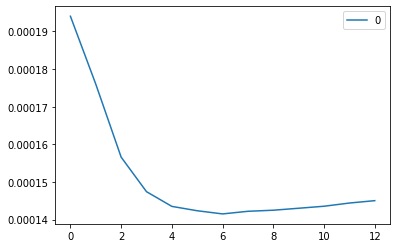

In [101]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [102]:
model = neighbors.KNeighborsRegressor(n_neighbors = 5)
model.fit(newtrain_X, trainY_final[['Latitude_OP','Longitude_OP']])  #fit the model
pred_knn=model.predict(newtest_X) #make prediction on test set


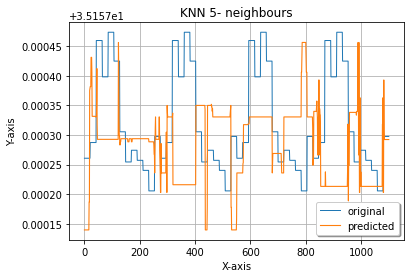

In [103]:
# pred=model.predict(newtest_X)
x_ax = range(len(testY_final[['Latitude_OP']]))
plt.plot(x_ax, testY_final[['Latitude_OP']], linewidth=1, label="original")
plt.plot(x_ax, pred_knn[:,0], linewidth=1.1, label="predicted")
plt.title("KNN 5- neighbours")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

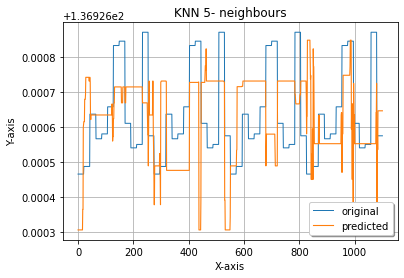

In [104]:
# pred=model.predict(newtest_X)
x_ax = range(len(testY_final[['Longitude_OP']]))
plt.plot(x_ax, testY_final[['Longitude_OP']], linewidth=1, label="original")
plt.plot(x_ax, pred_knn[:,1], linewidth=1.1, label="predicted")
plt.title("KNN 5- neighbours")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [105]:
pred = pd.DataFrame(pred_knn, columns = ['Latitude','Longitude'])
pred['dist_err'] = (((pred['Latitude']-testY_final['Latitude_OP'])*111000)**2 + (((pred['Longitude']-testY_final['Longitude_OP'])*111000)**2))**0.5
pred['dist_err'].mean()

20.320987330547233

In [106]:
pred['dist_err'].max()

61.28648126758737

In [ ]:
count = len([i for i in list(pred['dist_err']) if i  < 2])
low_error = count / len(list(pred['dist_err'])) * 100
print("Percentage of data with less than 2m error : ",low_error)

Percentage of data with less than 2m error :  0.2724795640326975


##Summary

We discovered that the data set downloaded was in relatively clean state and therefore we did not have to clean up the data. However, feature engineering was required to come to the conclusions regarding the data. 

Since the number of Reference point in the training dataset is limited to 13, and is not uniformly distributed over the localisation area, satisfactory results could not be obtained using RSSI fingerprinting technique.

## Future aspects for improvement

Filters such as Kalman Filter and Gaussian Filter can be applied to the data if the data collected is in the form of a Time-Series with changes in Latitude and Longitude. 

More number of reference points in the data provided would significantly improve the performance of the models.

## References

- Shen, Y., Hwang, B. and Jeong, J.P., 2020. Particle Filtering-Based Indoor Positioning System for Beacon Tag Tracking. IEEE Access, 8, pp.226445-226460.

- Li, G., Geng, E., Ye, Z., Xu, Y., Lin, J. and Pang, Y., 2018. Indoor positioning algorithm based on the improved RSSI distance model. Sensors, 18(9), p.2820.

- Bullmann, M., Fetzer, T., Ebner, F., Ebner, M., Deinzer, F. and Grzegorzek, M., 2020. Comparison of 2.4 GHz WiFi FTM-and RSSI-based indoor positioning methods in realistic scenarios. Sensors, 20(16), p.4515.

- Sung, Y., 2016. RSSI-based distance estimation framework using a Kalman filter for sustainable indoor computing environments. Sustainability, 8(11), p.1136.